In [42]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# https://www.kaggle.com/unsdsn/world-happiness
wh = pd.read_csv('world-happiness-2016.csv')

In [3]:
wh.head(3)
# wh["Region"].value_counts()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [5]:
# Select an outcome variable and then pick four or five other variables
# (one to two categorical, three to four continuous) to act as the basis for features

# Our outcome variable will be happiness score
# Categorical: Region
# Continuous: Generosity, Freedom, Family


In [6]:
# Explore the variables

region = wh["Region"].value_counts()
print("Regions:\n", region)

region_missing = wh["Region"].shape[0] - wh["Region"].dropna().shape[0]
print("We are missing {} records.".format(region_missing))

print("==========")

generosity = wh["Generosity"]
print("Generosity: \n", generosity.describe())

print("==========")

freedom = wh["Freedom"]
print("Freedom: \n", freedom.describe())

print("==========")

family = wh["Family"]
print("Family: \n", family.describe())

Regions:
 Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64
We are missing 0 records.
Generosity: 
 count    157.000000
mean       0.242635
std        0.133756
min        0.000000
25%        0.154570
50%        0.222450
75%        0.311850
max        0.819710
Name: Generosity, dtype: float64
Freedom: 
 count    157.000000
mean       0.370994
std        0.145507
min        0.000000
25%        0.257480
50%        0.397470
75%        0.484530
max        0.608480
Name: Freedom, dtype: float64
Family: 
 count    157.000000
mean       0.793621
std        0.266706
min        0.000000
25%        0.641840
50%        0.841420
75%        1.021520

In [7]:
# And bivariate methods you've learned so far.

df_europe = wh.loc[(wh['Region'] == 'Central and Eastern Europe') | (wh['Region'] == 'Western Europe'), ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)', 'Generosity']]
df_europe.head(3)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678


/Users/carl/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/carl/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


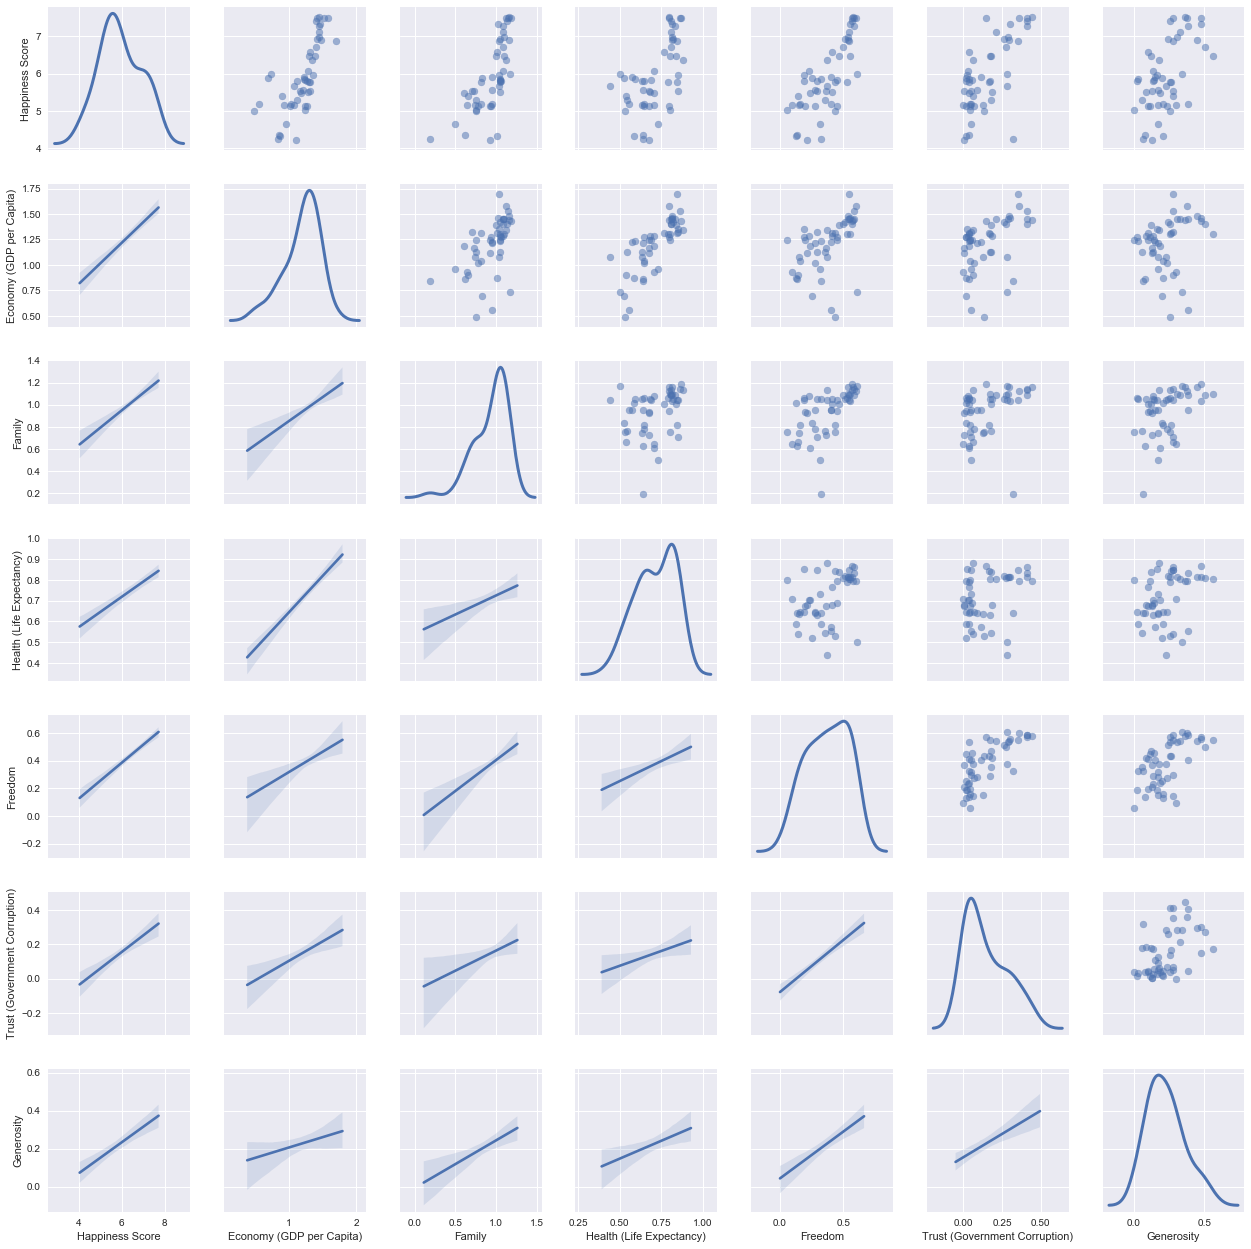

In [8]:
g = sns.PairGrid(df_europe, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [9]:
corrmat = df_europe.corr()
print(corrmat)

                               Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.725983   
Economy (GDP per Capita)              0.725983                  1.000000   
Family                                0.713022                  0.550411   
Health (Life Expectancy)              0.586284                  0.787926   
Freedom                               0.762738                  0.482710   
Trust (Government Corruption)         0.678446                  0.446595   
Generosity                            0.578078                  0.215900   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Score                0.713022                  0.586284  0.762738   
Economy (GDP per Capita)       0.550411                  0.787926  0.482710   
Family                         1.000000                  0.323086  0.575892   
Health (Life Expectancy)       0.323086                  1.000000  0.420990

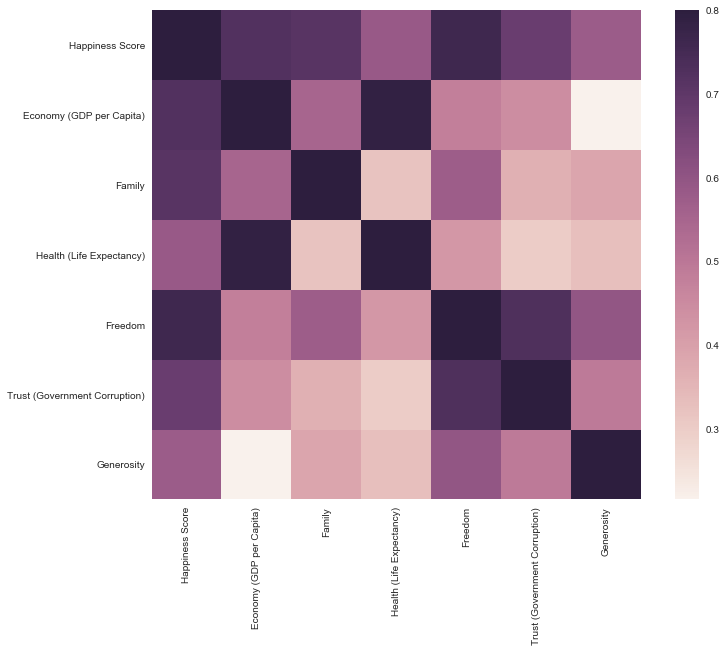

In [10]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/Users/carl/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


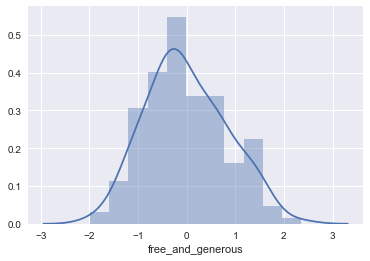

In [38]:
# Based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

from sklearn import preprocessing

# Turn data into indicator variables
features = pd.get_dummies(wh['Region'])

# Highly free, highly generous (0 or 1)
# Center it along the mean, and make 1 = one stdev
# We can use preprocessing for that

features["generous"] = preprocessing.scale(wh["Generosity"])
features["freedom"] = preprocessing.scale(wh["Freedom"])
features["economy"] = preprocessing.scale(wh["Economy (GDP per Capita)"])
features["family"] = preprocessing.scale(wh["Family"])

# Now that have them on the same scale, we can create a new features "highly_free_and_highly_generous" this would be the mean of those two.
# We can say that anything above 1 = highly (of those two things)
features["free_and_generous"] = (features["freedom"] + features["generous"]) / 2

#sns.distplot(features["generous"])
#sns.distplot(features["freedom"])
#sns.distplot(features["economy"])
sns.distplot(features["free_and_generous"])

In [39]:
features["highly_free_highly_generous"] = np.where(features["free_and_generous"] > 1, 1, 0)

# From the heatmap above, we can see that economy, family, and freedom are tightly related to happiness score
# Let's combine the three into one variable

features["econ_fam_free"] = (features["economy"] + features["generous"] + features["family"]) / 3
features["high_econ_fam_free"] = np.where(features["econ_fam_free"] > 1, 1, 0)

In [41]:
features.head()

,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe,generous,freedom,economy,family,free_and_generous,highly_free_highly_generous,econ_fam_free,high_econ_fam_free
0,0,0,0,0,0,0,0,0,0,1,0.893092,1.436930,1.186299,1.392183,1.165011,1,1.157191,1
1,0,0,0,0,0,0,0,0,0,1,0.286472,1.479400,1.394308,1.322597,0.882936,0,1.001126,1
2,0,0,0,0,0,0,0,0,0,1,1.756145,1.346129,1.149536,1.465607,1.551137,1,1.457096,1
3,0,0,0,0,0,0,0,0,0,1,1.022396,1.551931,1.516148,1.253612,1.287163,1,1.264052,1
4,0,0,0,0,0,0,0,0,0,1,0.092141,1.379223,1.099253,1.282725,0.735682,0,0.824707,0


In [23]:
# Use filtering methods to select the five best features and justify your choices

In [49]:
# Question: Now that we have created our features, how do we determine how well they help predict happiness?
# Example: I want to see how good "features["high_econ_fam_free"]" is an indicator for "Happiness".
#
#
#


In [51]:
# Question: How can we use PCA to know which features to keep here?
X = StandardScaler().fit_transform(df_europe)
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 3.46382352,  0.71699057,  0.13689823,  0.70703669],
       [ 3.47637781, -0.14102618,  0.23009794,  0.9045292 ],
       [ 3.10195506,  0.01414656, -0.04768955, -1.47373554],
       [ 3.43385002,  0.30042645,  0.14738608,  0.3405194 ],
       [ 2.97262678,  0.2372334 ,  0.02665663,  1.06600631],
       [ 3.02042141,  0.56361266,  0.68678763, -0.51422368],
       [ 3.29409125,  0.51437415,  0.57234932,  0.41197923],
       [ 2.35157625, -0.12933881, -0.01456764, -0.19566106],
       [ 2.45474039, -0.08282063,  0.08109628,  0.21972084],
       [ 2.05330916, -0.37264459,  0.10418848,  0.42944221],
       [ 2.97608769,  0.39147905,  0.17097942, -0.51902408],
       [ 2.905872  , -0.64073719,  0.5291943 ,  0.82820399],
       [ 2.57984614,  0.63405012,  0.52726355, -0.92970009],
       [ 0.24883856, -1.12798488, -0.66818829,  0.12827057],
       [ 2.33021253,  0.91191808,  0.40810116, -1.71572798],
       [ 1.10167231, -1.12608629, -0.01901943,  0.5906215 ],
       [ 0.87528087, -1.